# PH COVID-19 Dataset Analysis

### Source:
    DOH COVID-19 Data Drop(August 15, 2021): https://data.gov.ph/

### Tasks:
    1. Determine the total deaths, total cases, death percentage, and recovery rate.
    2. Which age group has the highest number of cases?
    3. Mean of the ages of the every patient, recovered patients, and casualties
    4. Which sex has the higher number of cases?
    5. Total cases per region

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#creating a dataframe using the COVID.csv file
df = pd.read_csv('COVID.csv')
df.head()

,CaseCode,Age,AgeGroup,Sex,DateSpecimen,DateResultRelease,DateRepConf,DateDied,DateRecover,RemovalType,...,ProvRes,CityMunRes,CityMuniPSGC,BarangayRes,BarangayPSGC,HealthStatus,Quarantined,DateOnset,Pregnanttab,ValidationStatus
0,C211770,51.0,50 to 54,FEMALE,2021-01-12,2021-01-14,2021-01-16,NaN,2021-01-02,RECOVERED,...,SOUTH COTABATO,CITY OF KORONADAL (CAPITAL),PH126306000,NaN,NaN,RECOVERED,NO,2021-01-01,NO,NaN
1,C64202914,35.0,35 to 39,MALE,NaN,NaN,2021-04-19,NaN,NaN,RECOVERED,...,NaN,NaN,NaN,NaN,NaN,RECOVERED,NO,2021-04-16,NaN,"Health Status is ""Recovered"", but no Date Reco..."
2,C27258607,27.0,25 to 29,FEMALE,2021-08-09,2021-08-10,2021-08-12,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,MILD,NO,NaN,NO,NaN
3,C187298,36.0,35 to 39,FEMALE,2020-07-23,2020-07-28,2020-07-31,NaN,NaN,RECOVERED,...,LAGUNA,CITY OF CALAMBA,PH043405000,NaN,NaN,RECOVERED,NO,NaN,NO,"Removal Type is ""Recovered"", but no Recovered ..."
4,C582484,22.0,20 to 24,FEMALE,2020-08-23,2020-08-26,2020-08-28,NaN,NaN,RECOVERED,...,LANAO DEL SUR,MARANTAO,PH153616000,NaN,NaN,RECOVERED,NO,NaN,NO,"Removal Type is ""Recovered"", but no Recovered ..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1741616 entries, 0 to 1741615
Data columns (total 22 columns):
 #   Column             Dtype  
---  ------             -----  
 0   CaseCode           object 
 1   Age                float64
 2   AgeGroup           object 
 3   Sex                object 
 4   DateSpecimen       object 
 5   DateResultRelease  object 
 6   DateRepConf        object 
 7   DateDied           object 
 8   DateRecover        object 
 9   RemovalType        object 
 10  Admitted           object 
 11  RegionRes          object 
 12  ProvRes            object 
 13  CityMunRes         object 
 14  CityMuniPSGC       object 
 15  BarangayRes        object 
 16  BarangayPSGC       object 
 17  HealthStatus       object 
 18  Quarantined        object 
 19  DateOnset          object 
 20  Pregnanttab        object 
 21  ValidationStatus   object 
dtypes: float64(1), object(21)
memory usage: 292.3+ MB


In [4]:
#Creating a new dataframe and only including neccessary columns
df1 = pd.read_csv('COVID.csv', usecols=[0,1,2,3,9,11,17])
df1.head(len(df))

,CaseCode,Age,AgeGroup,Sex,RemovalType,RegionRes,HealthStatus
0,C211770,51.0,50 to 54,FEMALE,RECOVERED,Region XII: SOCCSKSARGEN,RECOVERED
1,C64202914,35.0,35 to 39,MALE,RECOVERED,ROF,RECOVERED
2,C27258607,27.0,25 to 29,FEMALE,NaN,ROF,MILD
3,C187298,36.0,35 to 39,FEMALE,RECOVERED,Region IV-A: CALABARZON,RECOVERED
4,C582484,22.0,20 to 24,FEMALE,RECOVERED,BARMM,RECOVERED
...,...,...,...,...,...,...,...
1741611,C41519655,26.0,25 to 29,FEMALE,RECOVERED,Region IV-B: MIMAROPA,RECOVERED
1741612,C63661096,28.0,25 to 29,FEMALE,RECOVERED,Region IV-B: MIMAROPA,RECOVERED
1741613,C76046508,42.0,40 to 44,MALE,RECOVERED,Region IV-B: MIMAROPA,RECOVERED
1741614,C97901071,49.0,45 to 49,MALE,RECOVERED,Region IV-B: MIMAROPA,RECOVERED


---

## Task 1: Determine the Total Deaths, Total Cases, Death Percentage, and Recovery Rate

In [5]:
#Determining the total number of cases
total = df1.shape[0]
print("Total number of cases as of Aug. 15, 2021:",total)

Total number of cases as of Aug. 15, 2021: 1741616


In [6]:
tally = df1['HealthStatus'].value_counts()
tally.to_frame()

,HealthStatus
RECOVERED,1608528
MILD,98561
DIED,30340
SEVERE,1364
ASYMPTOMATIC,1091
MODERATE,952
CRITICAL,780


In [7]:
#Extracting the values of death tally(died) and recovered tally(rec) to get the total number of `active` cases
died = df1.HealthStatus.value_counts().DIED
rec = df1.HealthStatus.value_counts().RECOVERED
ac = total-(rec+died)
print("Total active cases as of Aug. 15, 2021:", ac)

Total active cases as of Aug. 15, 2021: 102748


In [8]:
values = [ac, died, rec]
label = ['Active Cases', 'Deaths', 'Recoveries']

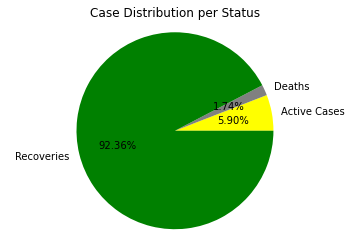

In [9]:
plt.pie(values, labels=label, autopct='%0.2f%%', colors = ['yellow', 'gray', 'green'])
plt.axis("equal")
plt.title("Case Distribution per Status")
plt.show()

---

## Task 2: Which age group has the highest number of cases?

In [10]:
#Number of Cases per Age Group
casesPerAgeGroup = df1['AgeGroup'].value_counts()
casesPerAgeGroup.to_frame()

,AgeGroup
25 to 29,249013
30 to 34,219960
20 to 24,180349
35 to 39,170191
40 to 44,148174
45 to 49,123820
50 to 54,115714
55 to 59,102452
60 to 64,82995
15 to 19,72638


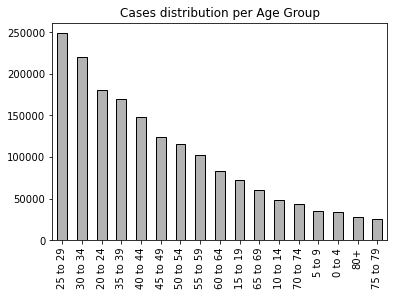

In [11]:
ageGroup_bar = casesPerAgeGroup.plot(kind = "bar", color="0.7", ec="black")
ageGroup_bar.set_title("Cases distribution per Age Group")
plt.show()

In [12]:
#Death and Recoveries per Age Group
df1['Count'] = 1
tallyPerAgeGroup = df1.groupby(['RemovalType', 'AgeGroup']).count()['Count']
tallyPerAgeGroup.to_frame()

Count
RemovalType AgeGroup        
DIED        0 to 4       242
            10 to 14      72
            15 to 19     137
            20 to 24     247
            25 to 29     445
            30 to 34     610
            35 to 39     812
            40 to 44    1109
            45 to 49    1661
            5 to 9        38
            50 to 54    2413
            55 to 59    3111
            60 to 64    4046
            65 to 69    4350
            70 to 74    4122
            75 to 79    2836
            80+         4074
RECOVERED   0 to 4     30930
            10 to 14   44617
            15 to 19   67601
            20 to 24  169571
            25 to 29  234946
            30 to 34  207107
            35 to 39  159756
            40 to 44  138758
            45 to 49  115224
            5 to 9     32374
            50 to 54  106637
            55 to 59   93228
            60 to 64   74082
            65 to 69   52567
            70 to 74   36484
            75 to 79   20357
            80+        21983

------

## Task 3: Mean of the ages of the every patient, recovered patients, and casualties

In [13]:
#Mean of the ages of covid-19 patients
mean = np.mean(df1['Age'])
print(round(mean, 2))

38.35


In [14]:
#filtering all recovered cases
rec_f = df1.HealthStatus.str.contains('RECOVERED')
df_rec = df1[rec_f]
df_rec.shape[0]

1608528

In [15]:
#mean of the ages of covid-19 patients that recovered
mean_rec = round(np.mean(df_rec['Age']),2)
mean_rec

37.89

In [16]:
#filtering all death cases
died_f = df1.HealthStatus.str.contains('DIED')
df_died = df1[died_f]
df_died.shape[0]

30340

In [17]:
#mean of the ages of covid-19 patients that died
mean_died = round(np.mean(df_died['Age']), 2)
mean_died

62.78

In [18]:
#computing for standard deviation and variance
std = round(np.std(df1['Age']), 2)
var = round(np.var(df1['Age']), 2)
print("Standard Deviation:", std)
print("Variance:", var)

Standard Deviation: 17.71
Variance: 313.5


---

## Task 4:  Which sex has the most number of cases?

In [20]:
tallyPerSex = df1['Sex'].value_counts()
tallyPerSex.to_frame()

,Sex
MALE,895189
FEMALE,846427


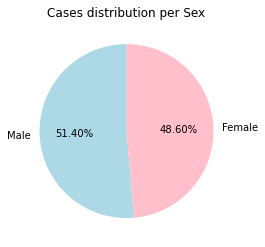

In [21]:
plt.pie(tallyPerSex, startangle = 90, autopct = '%0.2f%%', colors = ['lightblue', 'pink'], labels = ["Male", "Female"])
plt.title('Cases distribution per Sex')
plt.show()

---

## Task 5: Total cases per Region

In [22]:
tallyPerRegion = df1['RegionRes'].value_counts()
tallyPerRegion.to_frame()

,RegionRes
NCR,593551
Region IV-A: CALABARZON,295256
Region III: Central Luzon,162477
Region VII: Central Visayas,106493
Region VI: Western Visayas,98178
Region II: Cagayan Valley,65036
Region XI: Davao Region,61465
Region X: Northern Mindanao,49628
Region I: Ilocos Region,48715
CAR,46067


In [23]:
#replacing all acronyms
df1['RegionRes'].replace(['NCR', 
                          'CAR', 
                          'ROF', 
                          'BARMM'], 
                         ['National Capital Region', 
                          'Cordillera Administrative Region',
                          'Returning Overseas Filipinos',
                          'Bangsamoro Administrative Region in Muslim Mindanao'], inplace=True)
tallyPerRegion = df1['RegionRes'].value_counts()
tallyPerRegion.to_frame()

,RegionRes
National Capital Region,593551
Region IV-A: CALABARZON,295256
Region III: Central Luzon,162477
Region VII: Central Visayas,106493
Region VI: Western Visayas,98178
Region II: Cagayan Valley,65036
Region XI: Davao Region,61465
Region X: Northern Mindanao,49628
Region I: Ilocos Region,48715
Cordillera Administrative Region,46067


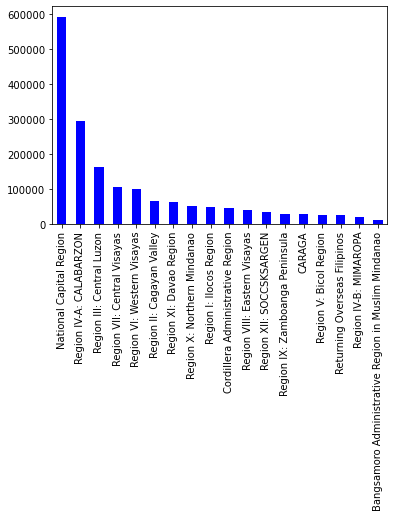

In [24]:
region_bar = tallyPerRegion.plot(kind = "bar", color= "blue")
ageGroup_bar.set_title("Cases distribution per Region")
plt.show()